In [1]:
import pandas as pd
import numpy as np

In [19]:
# import result_1.csv
df = pd.read_csv('results_0.csv')
df.keys()

Index(['Unnamed: 0', 'labels', 'predictions'], dtype='object')

In [20]:
labels = df['labels'].values
preds = df['predictions'].values
labels = labels*100
preds = preds*100
mse = np.sqrt(np.mean((labels - preds)**2))
print(mse)

24.699701980874824


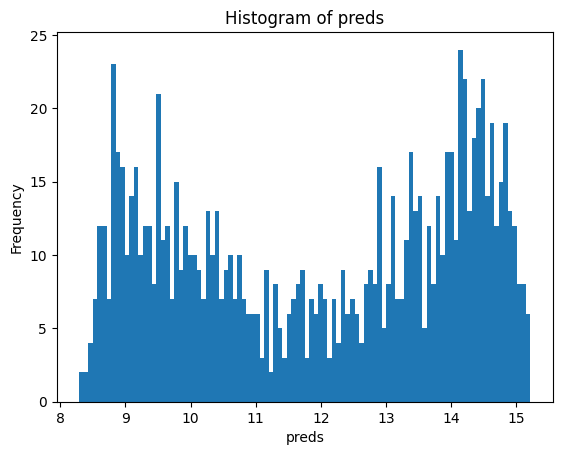

In [21]:
#plot histogram of labels
import matplotlib.pyplot as plt
plt.hist(preds, bins=100)
plt.title('Histogram of preds')
plt.xlabel('preds')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Histogram of labels')

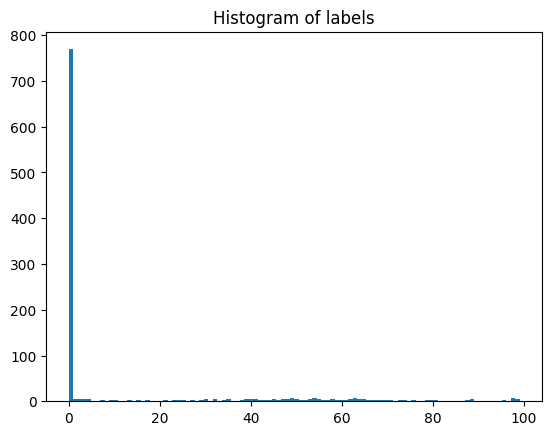

In [25]:
# plot histogram of labels
plt.hist(labels, bins=100)
plt.title('Histogram of labels')

In [24]:
#plot ecdf of labels using plotly
import plotly.express as px
fig = px.ecdf(df*100, x='labels')
fig.show()


In [26]:
from torchmetrics import MeanSquaredError,  MetricCollection
metric_collection = MetricCollection([
                MeanSquaredError( squared = False, num_outputs=1),
            ])

In [27]:
metric_collection['MeanSquaredError'].squared

False

In [3]:
import pickle
import numpy as np
#file_dir = '/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/Introspect3D/results_1720707043.6656635.pkl'
file_dir = '/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/Introspect3D/outputs/results/simple_trouble_her.pkl'
# load the results
with open(file_dir, 'rb') as f:
    te_results = pickle.load(f)
    print(te_results.keys())
print(te_results['labels'].shape)

dict_keys(['labels', 'predictions', 'filenames'])
(5464, 1)


In [4]:

#file_dir = '/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/Introspect3D/results_1720710262.4252326.pkl'
file_dir = '/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/Introspect3D/outputs/results/couple_PM_job.pkl'
# load the results
with open(file_dir, 'rb') as f:
    tr_results = pickle.load(f)
    print(tr_results.keys())
print(tr_results['labels'].shape)

dict_keys(['labels', 'predictions', 'filenames'])
(21855, 1)


In [5]:
results_byfile = {}
for file_itr, file_name in enumerate(tr_results['filenames']):
    results_byfile[file_name] = {'label': tr_results['labels'][file_itr], 'pred': tr_results['predictions'][file_itr]}
for file_itr, file_name in enumerate(te_results['filenames']):
    results_byfile[file_name] = {'label': te_results['labels'][file_itr], 'pred': te_results['predictions'][file_itr]}
# save the results by file as pickle
file_dir = '/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/Introspect3D/results_byfile.pkl'
with open(file_dir, 'wb') as f:
    pickle.dump(results_byfile, f)
    print('Results by file saved as pickle')

Results by file saved as pickle
